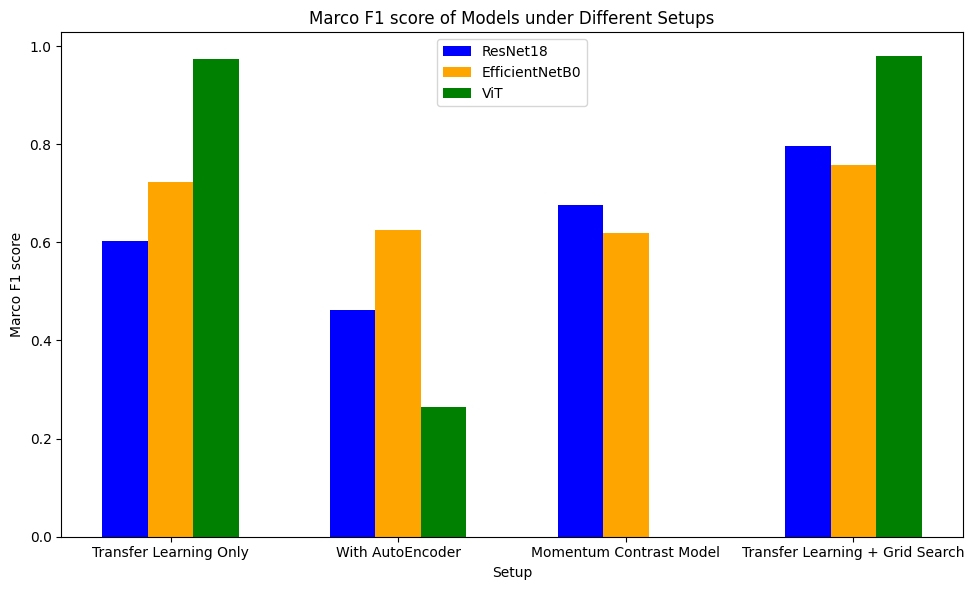

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the grouped bar chart
models = ['ResNet18', 'EfficientNetB0', 'ViT']
setups = ['Transfer Learning Only', 'With AutoEncoder', 'Momentum Contrast Model', 'Transfer Learning + Grid Search']

# Test Accuracy data
test_accuracy = {
    'ResNet18': [0.6051, 0.4641, 0.6783, 0.7990],
    'EfficientNetB0': [0.7306, 0.6246, 0.6216, 0.7593],
    'ViT': [0.9736, 0.2993, np.nan, 0.9791]
}

# Macro F1-score data
f1_score = {
    'ResNet18': [0.6034, 0.4617, 0.6761, 0.7972],
    'EfficientNetB0': [0.7225, 0.6246, 0.6181, 0.7585],
    'ViT': [0.9736, 0.2644, np.nan, 0.9791]
}

x = np.arange(len(setups))  # label locations
width = 0.2  # width of the bars

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's test accuracy as grouped bars
ax.bar(x - width, f1_score['ResNet18'], width, label='ResNet18', color='blue')
ax.bar(x, f1_score['EfficientNetB0'], width, label='EfficientNetB0', color='orange')
ax.bar(x + width, f1_score['ViT'], width, label='ViT', color='green')

# Add labels and title
ax.set_xlabel('Setup')
ax.set_ylabel('Marco F1 score')
ax.set_title('Marco F1 score of Models under Different Setups')
ax.set_xticks(x)
ax.set_xticklabels(setups)
ax.legend()

# Display the grouped bar chart
plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()


## ViT structure

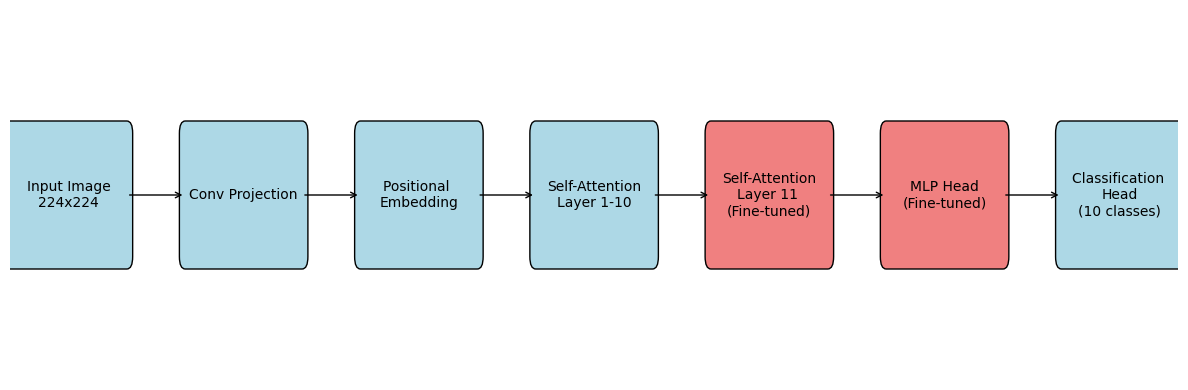

In [29]:
# Modifying the arrows to start from the right border of the left block to the left border of the right block
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(12, 4))

def add_block(ax, text, pos, size=(2, 1), color='lightblue'):
    """ Function to add a block to the diagram """
    ax.add_patch(FancyBboxPatch(pos, *size, boxstyle="round,pad=0.1", edgecolor='black', facecolor=color))
    ax.text(pos[0] + size[0] / 2, pos[1] + size[1] / 2, text, va='center', ha='center', fontsize=10)

# Left to right blocks representing ViT structure
add_block(ax, 'Input Image\n224x224', (0, 1))
add_block(ax, 'Conv Projection', (3, 1))
add_block(ax, 'Positional \nEmbedding', (6, 1))
add_block(ax, 'Self-Attention\nLayer 1-10', (9, 1))
# Fine-tuned blocks in a different color
add_block(ax, 'Self-Attention\nLayer 11 \n(Fine-tuned)', (12, 1), color='lightcoral')
add_block(ax, 'MLP Head\n(Fine-tuned)', (15, 1), color='lightcoral')
add_block(ax, 'Classification \nHead\n(10 classes)', (18, 1))

# Adjusted arrows to connect from right edge of one block to the left edge of the next block
ax.annotate('', xy=(3, 1.5), xytext=(2, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.annotate('', xy=(6, 1.5), xytext=(5, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.annotate('', xy=(9, 1.5), xytext=(8, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.annotate('', xy=(12, 1.5), xytext=(11, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.annotate('', xy=(15, 1.5), xytext=(14, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.annotate('', xy=(18, 1.5), xytext=(17, 1.5),
            arrowprops=dict(facecolor='black', arrowstyle="->"))

# Set limits and turn off axes
ax.set_xlim(0, 20)
ax.set_ylim(0, 3)
ax.axis('off')

# Show the diagram
plt.tight_layout()
plt.savefig('structure_ViT.png', dpi=300, bbox_inches='tight')
plt.show()
